In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/content/stock_data.csv')

In [4]:
df.head()

,Unnamed: 0,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
0,2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
1,2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2,2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
3,2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
4,2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283


In [5]:
df.dtypes

,0
Unnamed: 0,object
Stock_1,float64
Stock_2,float64
Stock_3,float64
Stock_4,float64
Stock_5,float64


In [8]:
df.describe()

,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,107.772577,81.105216,94.519502,117.407560,106.866865
std,7.398296,11.435212,6.519213,6.778527,3.760968
min,91.474442,62.414219,81.111434,99.909756,99.833309
25%,101.603117,69.328263,89.788068,112.209912,103.927072
50%,107.421299,84.283525,94.495546,117.788079,106.411328
75%,113.741728,91.548859,99.919465,123.132365,109.178007
max,121.901773,100.160928,107.588373,129.911386,116.243803


In [9]:
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [10]:
df.head()

,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
Date,,,,,
2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283


In [11]:
# Choose one stock (e.g., Stock_1)
stock = df['Stock_1']

In [12]:
# Convert dates into numeric days since start
df['Days'] = (df.index - df.index[0]).days
X = df[['Days']]
y = df['Stock_1']


In [13]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [14]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions
y_pred = model.predict(X_test)

In [16]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 123.00


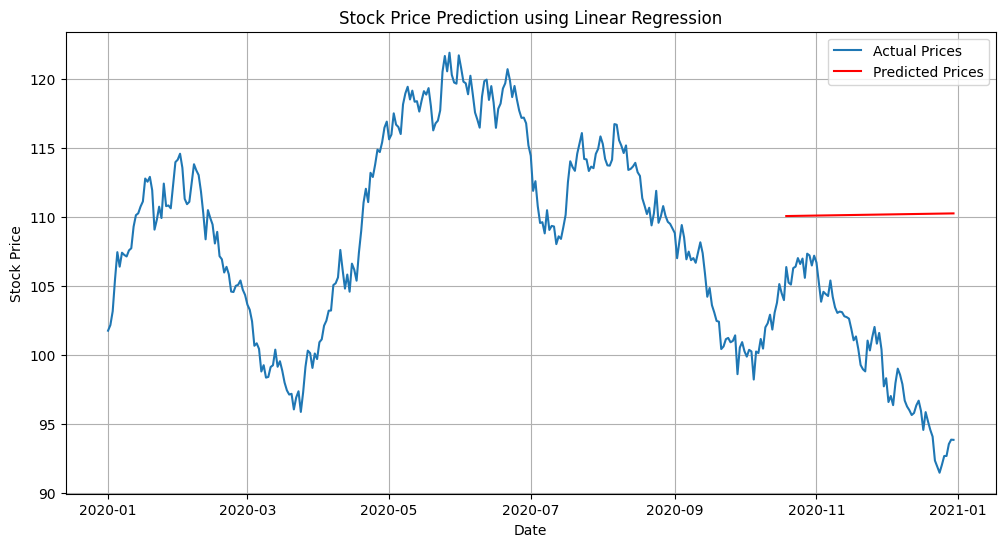

In [17]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, stock, label='Actual Prices')
plt.plot(X_test.index, y_pred, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.grid(True)
plt.show()
